In [3]:
import pandas as pd
from urllib import urlretrieve


In [2]:
URL = 'http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv'

In [3]:

#urllib.request

In [4]:
urlretrieve(URL, 'MaunaLoa.csv')

('MaunaLoa.csv', <httplib.HTTPMessage instance at 0x1166f57e8>)

In [5]:
print(URL)

http://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/weekly/weekly_in_situ_co2_mlo.csv


In [6]:
#!head -55 MaunaLoa.csv

In [7]:
df = pd.read_csv('MaunaLoa.csv', skiprows=44, names =['Date', 'CO2'], 
            index_col='Date', parse_dates=True )

In [88]:
#df.columns, df.index

(Index([u'CO2'], dtype='object'),
 DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
                '1958-04-26', '1958-05-03', '1958-05-17', '1958-05-24',
                '1958-07-05', '1958-07-12',
                ...
                '2017-07-01', '2017-07-08', '2017-07-15', '2017-07-22',
                '2017-07-29', '2017-08-05', '2017-08-12', '2017-08-19',
                '2017-08-26', '2017-09-02'],
               dtype='datetime64[ns]', name=u'Date', length=3031, freq=None))

In [8]:
df.head(2)

,CO2
Date,
1958-03-29,316.19
1958-04-05,317.31


# Indexing

* DataFrame	frame[colname]	Series corresponding to colname

* DataFrame	df.loc[row_indexer,column_indexer]

In [15]:
df.loc['2014-05-03', 'CO2']

401.74000000000001

In [16]:
df.iloc[5, 0]

316.94999999999999

In [14]:
#View all observations that occured in May 2014
df['2014-05']

,CO2
Date,
2014-05-03,401.74
2014-05-10,401.51
2014-05-17,402.18
2014-05-24,401.44
2014-05-31,402.12


In [54]:
rng = pd.date_range('1958-03-29', periods=3031, freq='W')
rng[-1]

Timestamp('2016-04-24 00:00:00', freq='W-SUN')

## Datetimes


In [131]:
df.index + pd.Timedelta(1,'Y')

DatetimeIndex(['1959-03-29 05:49:12', '1959-04-05 05:49:12',
               '1959-04-12 05:49:12', '1959-04-19 05:49:12',
               '1959-04-26 05:49:12', '1959-05-03 05:49:12',
               '1959-05-17 05:49:12', '1959-05-24 05:49:12',
               '1959-07-05 05:49:12', '1959-07-12 05:49:12',
               ...
               '2018-07-01 05:49:12', '2018-07-08 05:49:12',
               '2018-07-15 05:49:12', '2018-07-22 05:49:12',
               '2018-07-29 05:49:12', '2018-08-05 05:49:12',
               '2018-08-12 05:49:12', '2018-08-19 05:49:12',
               '2018-08-26 05:49:12', '2018-09-02 05:49:12'],
              dtype='datetime64[ns]', name=u'Date', length=3031, freq=None)

## Plotting

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline

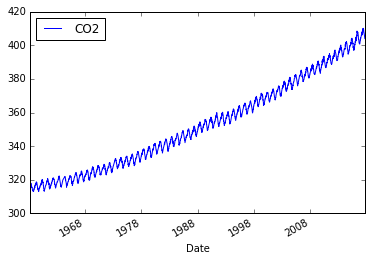

In [13]:
df.plot()

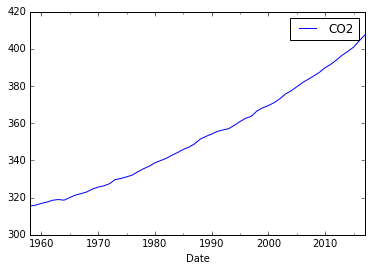

In [14]:
df.resample('A').mean().plot()



In [15]:
df['CO2'].isnull().sum()

0

In [17]:
## StatsModel

/Users/dansandiford/anaconda2/envs/gdal/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


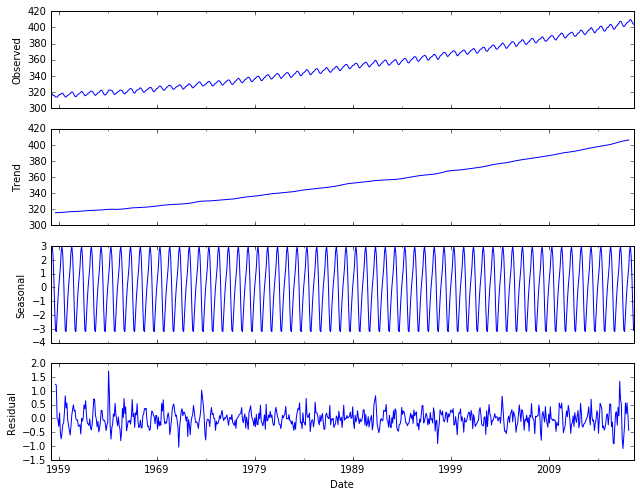

In [18]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 9, 7

y = df['CO2'].resample('MS').mean()
y = y.fillna(y.bfill())

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
#plt.show()

In [19]:
df.groupby(df.index.time).mean()

,CO2
00:00:00,353.154042


 ## Maths - Formulas and operations
 
 In Excel , you migh have something like: `sum(G2:I2)`

In [145]:
df['CO2_high'] = df['CO2']*1.2 
df['CO2_low'] = df['CO2']*0.8 


df['CO2_sum'] = df['CO2_high'] + df['CO2_low'] 

df.head(2)

,CO2,CO2_high,CO2_low,CO2_sum
Date,,,,
1958-03-29,316.19,379.428,252.952,632.38
1958-04-05,317.31,380.772,253.848,634.62


In [90]:
#mathmatical functions 

#If we apply a NumPy ufunc (maths faunction) on either of these objects, 
#the result will be another Pandas object with the indices preserved:

np.exp(df['CO2']/ df['CO2'].mean()).head(2)

Date
1958-03-29    2.448148
1958-04-05    2.455924
Name: CO2, dtype: float64

/Users/dansandiford/anaconda2/envs/gdal/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called diff(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


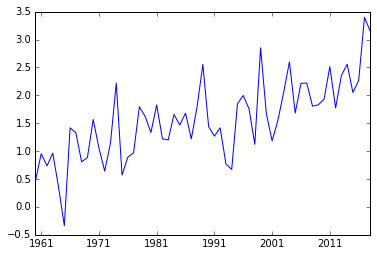

In [66]:
plt.plot(co2data.resample('A').diff())

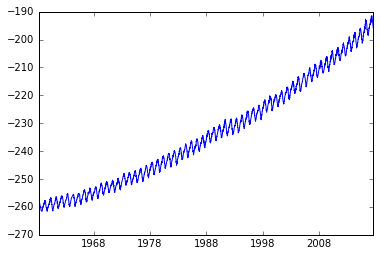

In [80]:
plt.plot(co2data - 100.*np.log(co2data))

DatetimeIndex(['1959-03-29 05:49:12', '1959-04-05 05:49:12',
               '1959-04-12 05:49:12', '1959-04-19 05:49:12',
               '1959-04-26 05:49:12', '1959-05-03 05:49:12',
               '1959-05-17 05:49:12', '1959-05-24 05:49:12',
               '1959-07-05 05:49:12', '1959-07-12 05:49:12',
               ...
               '2018-07-01 05:49:12', '2018-07-08 05:49:12',
               '2018-07-15 05:49:12', '2018-07-22 05:49:12',
               '2018-07-29 05:49:12', '2018-08-05 05:49:12',
               '2018-08-12 05:49:12', '2018-08-19 05:49:12',
               '2018-08-26 05:49:12', '2018-09-02 05:49:12'],
              dtype='datetime64[ns]', name=u'Date', length=3031, freq=None)

## Grouping / Aggregation

In [111]:
df2 = df.groupby(pd.TimeGrouper(freq='A')).mean()


In [113]:
df2.head(7)

,CO2
Date,
1958-12-31,315.474000
1959-12-31,315.945417
1960-12-31,316.898868
1961-12-31,317.634038
1962-12-31,318.597708
1963-12-31,318.953673
1964-12-31,318.617097


In [141]:
a = [1,2,3]
b =  a 

print('a and b are now:', a, b)

('a and b are now:', [1, 2, 3], [1, 2, 3])


In [142]:
a[2] = 4
print('but ... they are now both:', a, b)

('but ... they are now both:', [1, 2, 4], [1, 2, 4])


# Better plotting

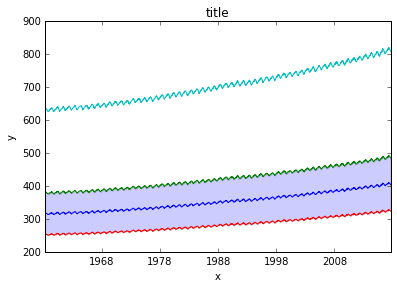

In [160]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot(df.index, df)
axes.fill_between(df.index, df.CO2_low, df.CO2_high, alpha=0.2)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

## Querying

DataFrame objects have a query() method that allows selection using an expression.

In [18]:
df.query('CO2 > 400')

,CO2
Date,
2013-05-18,400.04
2013-05-25,400.22
2014-03-15,400.68
2014-03-29,400.34
2014-04-05,401.32
2014-04-12,401.22
2014-04-19,401.29
2014-04-26,401.42
2014-05-03,401.74


In [19]:
df[df.CO2 > 400]

,CO2
Date,
2013-05-18,400.04
2013-05-25,400.22
2014-03-15,400.68
2014-03-29,400.34
2014-04-05,401.32
2014-04-12,401.22
2014-04-19,401.29
2014-04-26,401.42
2014-05-03,401.74


In [21]:
#df.CO2 > 400

## Geographical

In [22]:
!pip install geopy

    100% |████████████████████████████████| 71kB 1.2MB/s ta 0:00:01


In [24]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

In [26]:
location = geolocator.geocode("Mauna Loa")

In [40]:
location.longitude, location.latitude

(-155.6033202, 19.4790828)

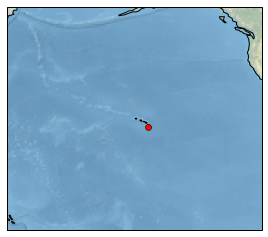

In [85]:
import cartopy.crs as ccrs

#projection=ccrs.Mollweide(location.longitude)
#projection=ccrs.PlateCarree()
projection = ccrs.PlateCarree(central_longitude=180)


ax = plt.axes(projection=projection)
ax.stock_img()

ax.set_extent([160, -120, -10, 50])

ax.coastlines()

plt.plot(location.longitude, location.latitude,
         color='red', linewidth=2, marker='o',
         transform=ccrs.PlateCarree(),
         )

## Pivot table 

In [4]:
# Load the data into a DataFrame
data = pd.read_csv('TradeoffData.csv')
 
data.head(n=6)


,Group,Treatment,Replicate,RelativeFitness
0,BKB,Tube,1,0.869963
1,BKB,Tube,2,1.000363
2,BKB,Tube,3,0.982935
3,BAC,Tube,1,0.810392
4,BAC,Tube,2,0.795107
5,JDK,Tube,1,0.849204


In [6]:
pd.pivot_table(dfT, index=['regiment','company'], aggfunc='mean')


In [10]:
pd.pivot_table(data, index=['Treatment'], aggfunc='max')

,Group,RelativeFitness,Replicate
Treatment,,,
Dish,SWI,1.699276,3
Tube,SWI,1.000363,3


In [12]:
pd.pivot_table(data, index=['Group', 'Treatment'], aggfunc='mean', values=['RelativeFitness'])

RelativeFitness
Group Treatment                 
BAC   Dish              1.633628
      Tube              0.802749
BKB   Dish              1.315682
      Tube              0.951087
DOS   Dish              1.587148
      Tube              0.945595
ECO   Dish              1.561197
      Tube              0.971033
ETH   Dish              1.482941
      Tube              0.934431
FIT   Dish              1.001960
      Tube              0.956410
H2W   Dish              1.525228
      Tube              0.902636
HHE   Dish              1.424773
      Tube              0.939615
JDK   Dish              1.546707
      Tube              0.890721
PPP   Dish              1.547974
      Tube              0.970277
SWI   Dish              1.451796
      Tube              0.918647